In [125]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns

In [126]:
#Reading the file
df=pd.read_csv(r"C:\Users\sroff\Documents\MMAI CURRICULUM\MBAN 6110 Data Sc 1\Midterm\midterm_data.csv")
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [127]:
#checking number of entries in each row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [128]:
#getting descriptive stats
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [129]:
df.drop_duplicates(inplace=True) #Checking and dropping duplciates, however no duplicates found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


We do have a few empty cells in the Location and Device coloumn. However, they are very small in number (less than 10%). Since they are strings, trying to impute these values with accuracy will not be useful as it would likely introduce incorrect data and falsify the results. So we are going to remove the rows with blank cells in these columns.

We will also drop the User ID and Session ID columns since they are just Identification numbers and do not provide and information

In [130]:
# find and drop rows with blank values in device and location column
df.dropna(subset='device',inplace=True)
df.dropna(subset='location',inplace=True)

In [131]:
# drop columns mentioned above
df = df.drop(['userID', 'sessions'], axis=1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4871 non-null   int64  
 1   time_spent       4871 non-null   float64
 2   pages_visited    4871 non-null   int64  
 3   cart_items       4871 non-null   int64  
 4   cart_value       4871 non-null   float64
 5   checkout_status  4871 non-null   int64  
 6   device           4871 non-null   object 
 7   location         4871 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 342.5+ KB


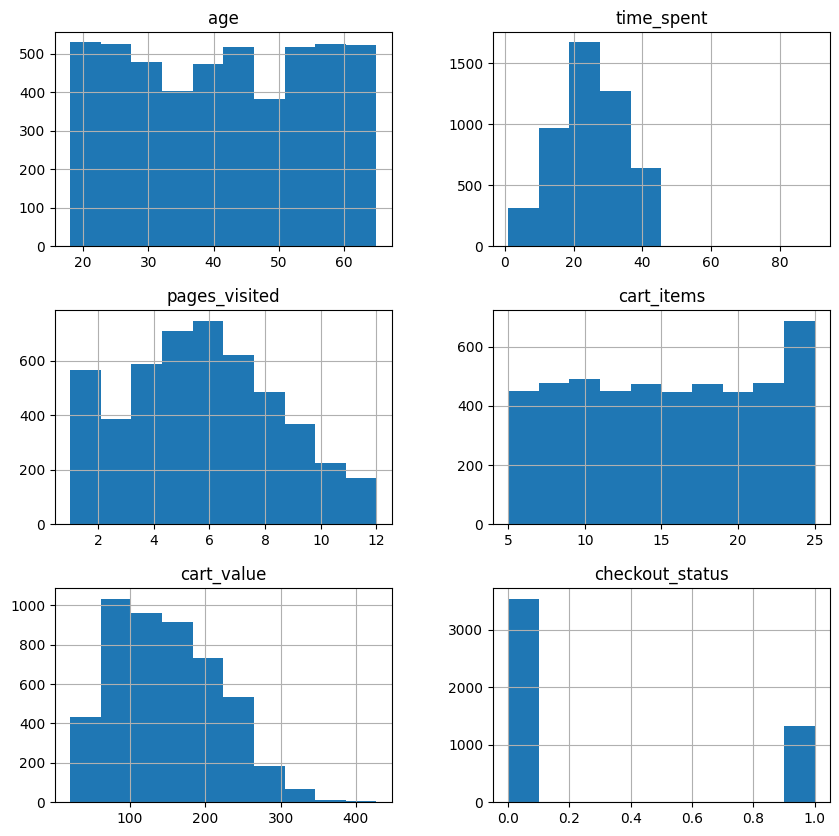

In [133]:
df.hist(figsize=(10,10)) #plotting histograms for numeric columns
plt.show()

To get a better understanding of the data based on age groups and outcome, we will create a new column with age ranges and outcomes. For that, we will create a function to classify the age.

In [134]:
# Create function to classify age_ranges
def age_range(x):
    if x < 31:
        return '18-30'
    elif x >= 31 and x < 51:
        return '31-50'
    elif x >= 51 and x < 66:
        return '51-65'
    else:
        return 'OTHERS'

In [135]:
# Create function to classify age_ranges
def result(x):
    if x == 0 :
        return 'Failure'
    
    else:
        return 'Success'

In [136]:
# Create new column with age range using age_range() function created above
df['age_range'] = df['age'].apply(age_range)
df['result'] = df['checkout_status'].apply(result)
df.head()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_range,result
0,62,13.295129,2,20,199.21,0,Desktop,Location 1,51-65,Failure
1,65,21.686405,3,21,294.82,0,Desktop,Location 3,51-65,Failure
2,18,17.135220,4,23,240.87,0,Desktop,Location 4,18-30,Failure
3,21,29.589311,8,16,183.78,1,Desktop,Location 2,18-30,Success
4,21,25.948584,4,10,59.51,1,Tablet,Location 4,18-30,Success


<Axes: xlabel='age_range'>

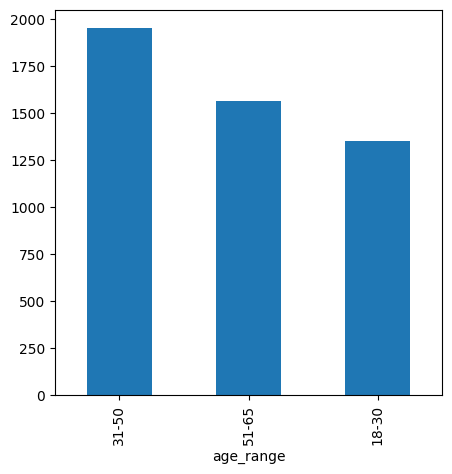

In [137]:
df.groupby('age_range')['age'].count().sort_values(ascending=False).plot(kind='bar', figsize=(5,5)) #checking for counts

<Axes: xlabel='age_range', ylabel='Count'>

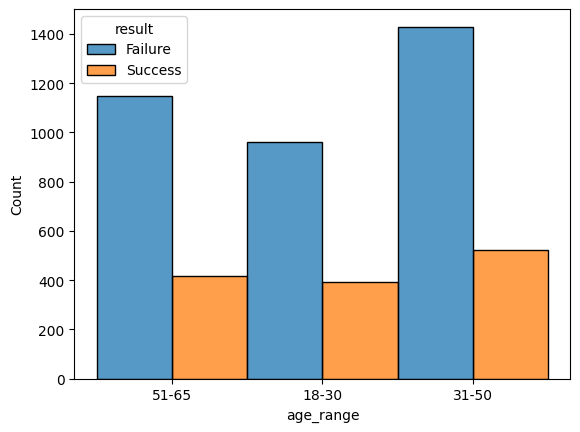

In [143]:
sns.histplot(binwidth=0.5, x="age_range", hue="result", data=df, stat="count", multiple="dodge")

<Axes: xlabel='device', ylabel='Count'>

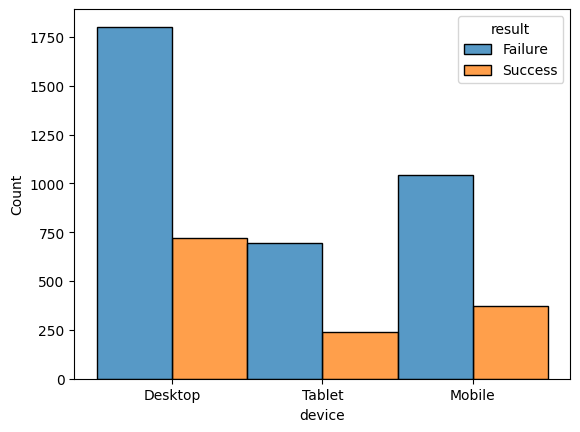

In [144]:
sns.histplot(binwidth=0.5, x="device", hue="result", data=df, stat="count", multiple="dodge")

<Axes: xlabel='location', ylabel='Count'>

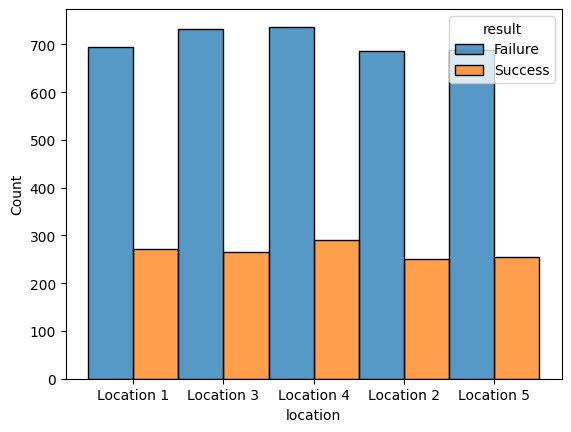

In [145]:
sns.histplot(binwidth=0.5, x="location", hue="result", data=df, stat="count", multiple="dodge")

We assessed the categorical values in the 3 histplots above. From the plots , we can conclude that
1.  For age ranges and locations, the results don't change much with respect to differnt age ranges or locations.
2. For devices, Desktop devices performed the worst in terms of sale conversion when the consumers used them to buy stuff from the e-commerce company.


Now we will check how the numerical variables behave when grouped by result

In [156]:
average_cart_value_by_result = df.groupby('result')['cart_value'].mean()
print(average_cart_value_by_result)

result
Failure    152.827485
Success    140.510871
Name: cart_value, dtype: float64


In [158]:
average_time_spent_by_result = df.groupby('result')['time_spent'].mean()
print(average_time_spent_by_result)

result
Failure    22.858777
Success    31.318157
Name: time_spent, dtype: float64


In [159]:
average_cart_items_by_result = df.groupby('result')['cart_items'].mean()
print(average_cart_items_by_result)

result
Failure    15.300367
Success    14.096847
Name: cart_items, dtype: float64


In [162]:
average_pages_visited_by_result = df.groupby('result')['pages_visited'].mean()
print(average_pages_visited_by_result)

result
Failure    5.208251
Success    7.289790
Name: pages_visited, dtype: float64


In [163]:
average_age_by_result = df.groupby('result')['age'].mean()
print(average_age_by_result)

result
Failure    41.645097
Success    41.234985
Name: age, dtype: float64


Assignment Questions -

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?
Ans- Behaviour of users based on given Metrics:
    1. Age/age range - No noticeable variation based on age/age range
    2. Location - No noticeable variation based on Location
    3. Device - Users with desktop devices have the lowest conversion rate.
    4. Cart value - Lower cart value -> higher covnversion rate
    5. Time Spent - Higher cart value -> higher covnversion rate
    6. Cart Items - No noticeable variation
    7. Pages visited- No noticeable variation

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Ans - Explained in Markdowns Above

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).
Ans - Target users with desktop application since they have the worst conversion rates. Work on the desktop application.